In [9]:
import numpy as np, seaborn as sns, pandas as pd
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [10]:
data = pd.read_csv('/kaggle/input/brasilian-houses-to-rent/houses_to_rent.csv') 

In [11]:
data.head()

,Unnamed: 0,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,0,1,240,3,3,4,-,acept,furnished,R$0,"R$8,000","R$1,000",R$121,"R$9,121"
1,1,0,64,2,1,1,10,acept,not furnished,R$540,R$820,R$122,R$11,"R$1,493"
2,2,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680"
3,3,1,73,2,2,1,12,acept,not furnished,R$700,"R$1,250",R$150,R$16,"R$2,116"
4,4,1,19,1,1,0,-,not acept,not furnished,R$0,"R$1,200",R$41,R$16,"R$1,257"


In [12]:
data.drop(data.columns[0],axis=1,inplace=True) 
data.dtypes

city               int64
area               int64
rooms              int64
bathroom           int64
parking spaces     int64
floor             object
animal            object
furniture         object
hoa               object
rent amount       object
property tax      object
fire insurance    object
total             object
dtype: object

In [13]:
data.describe().T.astype(int)

,count,mean,std,min,25%,50%,75%,max
city,6080,0,0,0,1,1,1,1
area,6080,151,375,10,58,100,200,24606
rooms,6080,2,1,1,2,3,3,10
bathroom,6080,2,1,1,1,2,3,10
parking spaces,6080,1,1,0,1,1,2,12


## Data Preprocessing


### Missing Data

In [14]:
data.isnull().sum()

city              0
area              0
rooms             0
bathroom          0
parking spaces    0
floor             0
animal            0
furniture         0
hoa               0
rent amount       0
property tax      0
fire insurance    0
total             0
dtype: int64

There is no any missing data in dataset

## Fuzzy Data

In [15]:
df = data.copy()
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,1,240,3,3,4,-,acept,furnished,R$0,"R$8,000","R$1,000",R$121,"R$9,121"
1,0,64,2,1,1,10,acept,not furnished,R$540,R$820,R$122,R$11,"R$1,493"
2,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680"
3,1,73,2,2,1,12,acept,not furnished,R$700,"R$1,250",R$150,R$16,"R$2,116"
4,1,19,1,1,0,-,not acept,not furnished,R$0,"R$1,200",R$41,R$16,"R$1,257"


##### FLOOR :  There are some "-" data  , we can see that it delegates 0 value, when we think on it.

In [16]:
df.floor.replace(to_replace="-",value="0",inplace=True)

In [17]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,1,240,3,3,4,0,acept,furnished,R$0,"R$8,000","R$1,000",R$121,"R$9,121"
1,0,64,2,1,1,10,acept,not furnished,R$540,R$820,R$122,R$11,"R$1,493"
2,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680"
3,1,73,2,2,1,12,acept,not furnished,R$700,"R$1,250",R$150,R$16,"R$2,116"
4,1,19,1,1,0,0,not acept,not furnished,R$0,"R$1,200",R$41,R$16,"R$1,257"


I don't see any other fuzzy data in dataset but in the next steps(converting data to int) we are already going to see fuzzy data


## Converting Data Types to Int

In [18]:
#deleting R and $ values from dataset to convert it int
df.replace(to_replace='R\$',value='',regex=True,inplace=True)

In [19]:
#deleting , values
df.replace(to_replace=',',value='',regex=True,inplace=True)

In [20]:
#converting acept and not acept in animal data to binary value
df.animal = df.animal.apply(lambda x: 1 if x=="acept" else 0)

In [21]:
#converting furnished and not furnished in furniture data to binary value
df.furniture = df.furniture.apply(lambda x: 1 if x=="furnished" else 0)

In [22]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,1,240,3,3,4,0,1,1,0,8000,1000,121,9121
1,0,64,2,1,1,10,1,0,540,820,122,11,1493
2,1,443,5,5,4,3,1,1,4172,7000,1417,89,12680
3,1,73,2,2,1,12,1,0,700,1250,150,16,2116
4,1,19,1,1,0,0,0,0,0,1200,41,16,1257


### Now lets convert to int our dataset

 result of => df = df.astype(int)

As we said,when I tried convert data to int, there are some also fuzzy data here lets clear them
it says there are some "Sem info" and "Incluso" values in data lets find it and remove fuzzification    

In [23]:
df.isin(['Incluso']).any()

city              False
area              False
rooms             False
bathroom          False
parking spaces    False
floor             False
animal            False
furniture         False
hoa                True
rent amount       False
property tax       True
fire insurance    False
total             False
dtype: bool

In [24]:
df.hoa.replace(to_replace='Sem info',value='0',inplace=True)

In [25]:
df.hoa.replace(to_replace='Incluso',value='0',inplace=True)

In [26]:
df["property tax"].replace(to_replace='Incluso',value='0',inplace=True)

In [27]:
#now convert to int
df = df.astype(int)

In [28]:
df.dtypes

city              int64
area              int64
rooms             int64
bathroom          int64
parking spaces    int64
floor             int64
animal            int64
furniture         int64
hoa               int64
rent amount       int64
property tax      int64
fire insurance    int64
total             int64
dtype: object

## Feature Engineering

In [29]:
df.corr()[df.corr()>0.7]

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
city,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
area,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rooms,NaN,NaN,1.000000,0.746876,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bathroom,NaN,NaN,0.746876,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
parking spaces,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
floor,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
animal,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
furniture,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
hoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
rent amount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,NaN,0.98589,NaN


There are so much colleration between <b> (rent amount, fire insurance)</b> and <b>(property tax,total)</b> and <b>(bathroom,rooms)</b>
let see them also ith graph

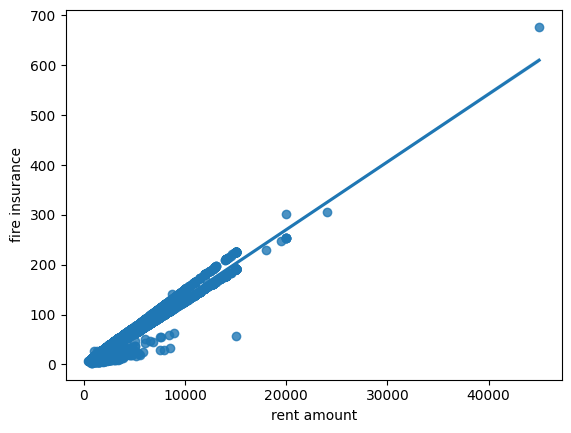

In [30]:
sns.regplot(data=df,x='rent amount',y = 'fire insurance');

<AxesSubplot: xlabel='property tax', ylabel='total'>

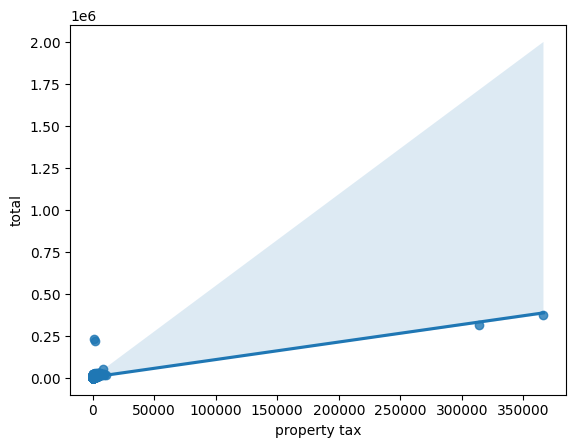

In [31]:
sns.regplot(data=df,x='property tax',y = 'total')

<AxesSubplot: xlabel='bathroom', ylabel='rooms'>

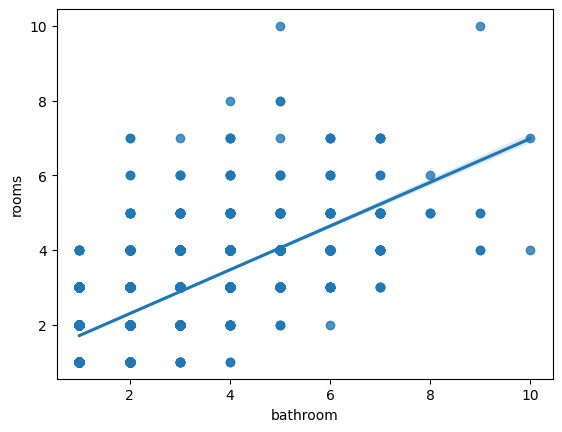

In [32]:
sns.regplot(data=df,x='bathroom',y = 'rooms')

According to graphs :

The standard deviation on (rent amount, fire insurance) is really small and this can be caused multiple correlation between independent variables and this affects our model bad lets remove  fire insurance. because fire insurance is already calculated in rent amount. why should we use it again?

For property tax, the property tax could be important to seperate our houses and the standart devision is so much so we will not delete it.

For bathroom, the bathroom is almost the same value with room value so I will also remove it

In [33]:
cleaned_df = df.drop(['bathroom','fire insurance'],axis=1)

# Variables creation

In [34]:
X = cleaned_df.drop('city',axis=1)
y = cleaned_df.city

In [35]:
#There are so much interval between values of independent variables lets normalize the intervals
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

In [36]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# Model Creation

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier

In [38]:
#Creation models without tuning them firstly
models = dict(
    lr_model = LogisticRegression(),
    svc_model = SVC(),
    nn_model = MLPClassifier(),
    rf_model = RandomForestClassifier(),
    cb_model = CatBoostClassifier()
)

In [39]:
#fitting models
for model in models.values():
    model.fit(x_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate set to 0.019121
0:	learn: 0.6755232	total: 65.3ms	remaining: 1m 5s
1:	learn: 0.6577175	total: 68.7ms	remaining: 34.3s
2:	learn: 0.6410579	total: 71.4ms	remaining: 23.7s
3:	learn: 0.6254407	total: 74ms	remaining: 18.4s
4:	learn: 0.6110453	total: 76.6ms	remaining: 15.2s
5:	learn: 0.5959870	total: 80.1ms	remaining: 13.3s
6:	learn: 0.5834063	total: 83.9ms	remaining: 11.9s
7:	learn: 0.5707540	total: 88.9ms	remaining: 11s
8:	learn: 0.5574709	total: 93.6ms	remaining: 10.3s
9:	learn: 0.5453660	total: 97.7ms	remaining: 9.67s
10:	learn: 0.5342380	total: 101ms	remaining: 9.1s
11:	learn: 0.5240388	total: 105ms	remaining: 8.63s
12:	learn: 0.5140038	total: 108ms	remaining: 8.23s
13:	learn: 0.5044843	total: 111ms	remaining: 7.85s
14:	learn: 0.4942339	total: 115ms	remaining: 7.58s
15:	learn: 0.4858205	total: 118ms	remaining: 7.27s
16:	learn: 0.4773334	total: 123ms	remaining: 7.1s
17:	learn: 0.4688941	total: 126ms	remaining: 6.89s
18:	learn: 0.4611526	total: 131ms	remaining: 6.74s
19:	lea

In [40]:
#let see the result of our models first and then tune them

for k,v in models.items():
    print("{} has score => {}".format(k,v.score(x_test,y_test)))

lr_model has score => 0.8612938596491229
svc_model has score => 0.8612938596491229
nn_model has score => 0.8733552631578947
rf_model has score => 0.9194078947368421
cb_model has score => 0.9205043859649122


# Model Tuning

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
#first let see the params of models to tuning
for k,v in models.items():
    print("{} model params are => {} \n".format(k,v.get_params()))

lr_model model params are => {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False} 

svc_model model params are => {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False} 

nn_model model params are => {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'rando

In [43]:
lr_test_params = {
    "C":(1,10)
    }
svc_test_params = {
    "C":(1,10)
    }
nn_test_params = { 
    "alpha":[0.1,0.01,0.02,0.001,0.005,0.0001],
    "hidden_layer_sizes":[(10,10,10),(100,100,100),(100,100)]
    }
cb_test_params = {
    "iterations":[200,300,500],
    "learning_rate":[0.01,0.05,0.1,0.001],
    "depth":[3,5,8,9]
    }
rf_test_params = {
    "max_depth":[2,5,8,10],
    "max_features":[2,3,5,8],
    "min_samples_split":[2,5,7,10],
    "n_estimators":[10,200,500,1000]
    }  

## LR Tuning


In [44]:
lr_Cv_model = GridSearchCV(models['lr_model'],lr_test_params,n_jobs=-1,cv=5)
lr_Cv_model.fit(x_train,y_train)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': (1, 10)})

In [45]:
lr_Cv_model.best_params_

{'C': 10}

In [46]:
lr_tuned = LogisticRegression(C=10).fit(x_train,y_train)

## SVC Tuning

In [47]:
svc_Cv_model = GridSearchCV(models['svc_model'],svc_test_params,n_jobs=-1,verbose=2,cv=5)
svc_Cv_model.fit(x_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1, param_grid={'C': (1, 10)},
             verbose=2)

In [48]:
svc_Cv_model.best_params_

{'C': 1}

In [49]:
#default value was already C=1
svc_tuned = models['svc_model']

## Neural Networks Tuning


In [50]:
nn_Cv_model = GridSearchCV(models['nn_model'],nn_test_params,n_jobs=-1,verbose=0,cv=5)
nn_Cv_model.fit(x_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptro

KeyboardInterrupt: 

In [ ]:
nn_Cv_model.best_params_

In [ ]:
nn_tuned = nn_model = MLPClassifier(**nn_Cv_model.best_params_).fit(x_train,y_train)

## Catboost Tuning

In [ ]:
cb_Cv_model = GridSearchCV(models['cb_model'],cb_test_params,n_jobs=-1,verbose=0,cv=10)
cb_Cv_model.fit(x_train,y_train)

In [ ]:
cb_Cv_model.best_params_

In [ ]:
cb_tuned = CatBoostClassifier(**cb_Cv_model.best_params_).fit(x_train,y_train)

# Tuned Models Scores

In [ ]:
tuned_models = dict(
    lr_tuned_model = lr_tuned,
    svc_tuned_model = svc_tuned,
    nn_tuned_model = nn_tuned,
    rf_tuned_model = models["rf_model"],
    cb_tuned_model = cb_tuned
)

### Let see the result of our tuned models 

In [ ]:
#let see the result of our tuned models 

for k,v in tuned_models.items():
    print("{} has score => {}".format(k,v.score(x_test,y_test)))

# Result

- <b> Score:  0.9216008771929824 
- <b> RMSE: 0.27310

the best model is <b> CatBoost</b> model